<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Text_Classificatiohn_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

https://hackernoon.com/nlp-datasets-from-huggingface-how-to-access-and-train-them-i22u35t9

## Core Libraries from HuggingFace Ecosystem

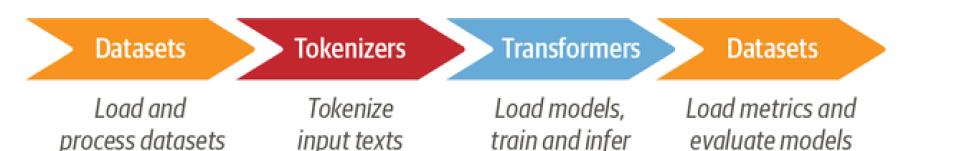


#### A typical pipeline for training transformer models with the Datasets, Tokenizers,and Transformers libraries

## 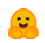Datasets to download the data from the Hugging Face Hub

#### Install Datasets Library

In [3]:
! pip install datasets 

In [4]:
import transformers
from datasets import list_datasets,load_dataset
from pprint import pprint

## List of Datasets

In [5]:
datasets_list = list_datasets() 
pprint(datasets_list,compact=True) 

['assin', 'ar_res_reviews', 'ambig_qa', 'bianet', 'ag_news', 'ajgt_twitter_ar',
 'aeslc', 'bc2gm_corpus', 'air_dialogue', 'acronym_identification',
 'afrikaans_ner_corpus', 'allegro_reviews', 'ade_corpus_v2', 'adversarial_qa',
 'alt', 'billsum', 'amazon_polarity', 'amttl', 'ascent_kb', 'big_patent',
 'bn_hate_speech', 'bswac', 'capes', 'arsentd_lev', 'bible_para',
 'amazon_reviews_multi', 'ai2_arc', 'beans', 'anli', 'arabic_pos_dialect',
 'best2009', 'boolq', 'ar_sarcasm', 'asnq', 'bnl_newspapers',
 'amazon_us_reviews', 'arxiv_dataset', 'banking77', 'bookcorpus', 'bprec', 'c3',
 'allocine', 'aslg_pc12', 'biosses', 'bbc_hindi_nli', 'americas_nli', 'biomrc',
 'blimp', 'aqua_rat', 'aquamuse', 'ar_cov19', 'arabic_speech_corpus', 'arcd',
 'blended_skill_talk', 'cail2018', 'blbooksgenre', 'bookcorpusopen',
 'bsd_ja_en', 'atomic', 'autshumato', 'blog_authorship_corpus', 'caner',
 'app_reviews', 'arabic_billion_words', 'art', 'asset', 'blbooks', 'brwac',
 'c4', 'ami', 'assin2', 'babi_qa', 'bba

## List of Dataset with Details

In [6]:
datasets_list = list_datasets(with_details=True) 
pprint(datasets_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Load Emotion Dataset

The load_dataset function will do the following.

* Download and import in the library the file processing script from the Hugging Face GitHub repo.
* Run the file script to download the dataset
* Return the dataset as asked by the user. By default, it returns the entire dataset

In [7]:
emotions = load_dataset('emotion')
emotions

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
emotions.keys()

dict_keys(['train', 'validation', 'test'])

## Retrive the training and test data

In [9]:
train = emotions['train']
val = emotions['validation']
test = emotions['test']

In [10]:
print(f" number of training samples {len(train)} \n number of validation samples {len(val)} \n numer of test samples {len(test)}")

 number of training samples 16000 
 number of validation samples 2000 
 numer of test samples 2000


#### access a single example by its index from training data

In [11]:
train[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
train.column_names

['text', 'label']

#### We can see what data types are being used under the hood by accessing the features attribute of a Dataset object:

In [13]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

* In this case, the data type of the text column is string, 
* the label column is a special ClassLabel object that contains information about the class names and their mapping to integers

In [14]:
print(train[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [15]:
print(train['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [16]:
print(train['label'][:5])

[0, 0, 3, 2, 3]


## 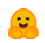Datasets provides several loading scripts to handle local and remote datasets.

* CSV ---> csv ---> **load_dataset("csv", data_files="my_file.c
sv")**

* Text ---> text ---> **load_dataset("text", data_files="my_file**
txt")
* JSON ---> json ---> **load_dataset("json", data_files="my_file**
jsonl")


In [17]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2022-04-21 11:23:46--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2022-04-21 11:23:46--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc187e501a02c1a0bff2456f4b94.dl.dropboxusercontent.com/cd/0/inline/Bj2Ia4SJ3V9PjW6Qf5LBWwYmD88Fzbs3eAufUK14svLDR0ujz02W7B3FzXj7d0VAFrJm9TMcfgM905Cjn8qBjvZpqW2-Cl3Y-5eSzCd8MNmgbfkhzOM59k72gux-dJ8YbAMC_Jj0LJjeIlc6jtkSEi-xCCz3A1pkIWlV_c3E7JMnUg/file# [following]
--2022-04-21 11:23:46--  https://uc187e501a02c1a0bff2456f4b94.dl.dropboxusercontent.com/cd/0/inline/Bj2Ia4SJ3V9PjW6Qf5LBWwYmD88Fzbs3eAufUK14svLDR0ujz02W7B3FzXj7d0VAFrJm9TMcfgM

## Display first five texts

In [18]:
!head -n 5 train.txt

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love
i am feeling grouchy;anger


## load the dataset locally by using the csv script

In [19]:
emotions_local = load_dataset("csv",data_files="train.txt",sep=";",names=['text','label'])

Using custom data configuration default-e7f05f3f9c49bfc1
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-e7f05f3f9c49bfc1/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

## Load the dataset directly from the url

In [20]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
emotions_remote = load_dataset("csv",data_files=dataset_url,sep=";",names=['text','label'])

Using custom data configuration default-a70389bc6b0a03f2
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-a70389bc6b0a03f2/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

## From Datasets to DataFrames

* 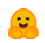 Datasets provides a set_format() method that allows us to change the output format of the Dataset

In [21]:
import pandas as pd
import numpy as np
emotions.set_format(type='pandas')
df_train = emotions["train"][:] # [:] necessary to convrert to a dataframe
df_test = emotions["test"][:]
df_val = emotions["validation"][:]

In [22]:
df_train.shape,df_test.shape,df_val.shape

((16000, 2), (2000, 2), (2000, 2))

In [23]:
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [24]:
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [25]:
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


## Create a new column to have the label name

In [26]:
emotions["train"].features["label"].int2str(0)

'sadness'

In [27]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [28]:
df_train["label_name"] = df_train['label'].map(label_int2str)
df_test["label_name"] = df_test['label'].map(label_int2str)
df_val["label_name"] = df_val['label'].map(label_int2str)

## Label Distribution

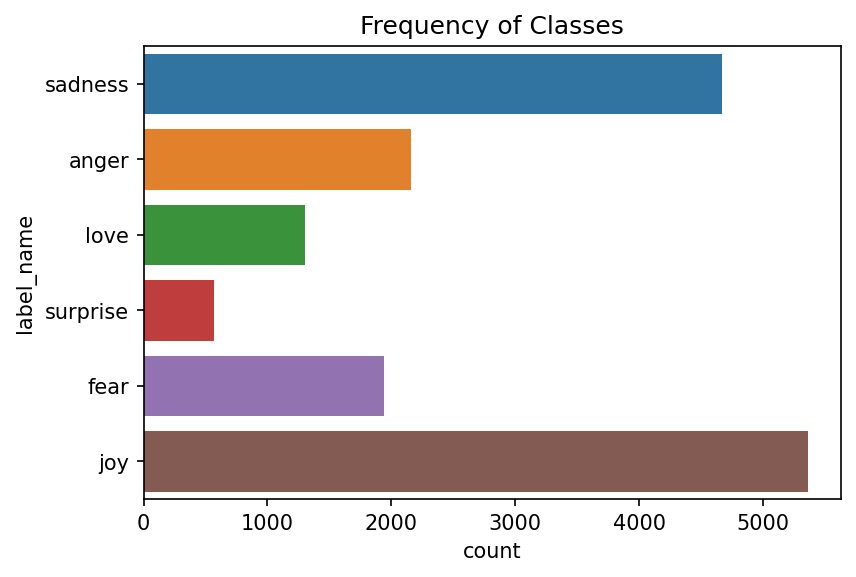

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(dpi=150)
sns.countplot(y='label_name',data=df_train)
plt.title("Frequency of Classes")
plt.show()

## There are several ways to deal with imbalanced data, including:

* Randomly oversample the minority class.
* Randomly undersample the majority class.
* Gather more labeled data from the underrepresented classes.

* Transformer models have a maximum input sequence length that is referred
to as the maximum context size. 

* For applications using DistilBERT, the
maximum context size is 512 tokens, which amounts to a few paragraphs of text.

## No of words per tweet

In [30]:
df_train['Words Per Tweet'] = df_train['text'].str.split().apply(len)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


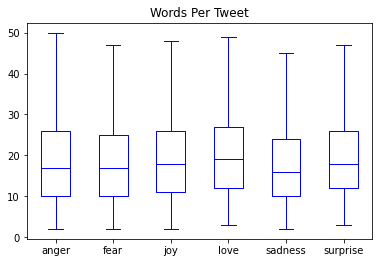

In [31]:
df_train.boxplot("Words Per Tweet", by="label_name", grid=False,showfliers=False, color="blue")
plt.suptitle("")
plt.xlabel("")
plt.show()

* From the plot we see that for each emotion, most tweets are around 15
words long and the longest tweets are well below DistilBERT’s maximum
context size.

#### Reset the output format of our dataset since we don’t need the DataFrame format anymore:


In [32]:
emotions.reset_format()

In [33]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## From Text to Tokens
* Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical
vectors. 

* Tokenization is the step of breaking down a string into the atomic units used in the model.


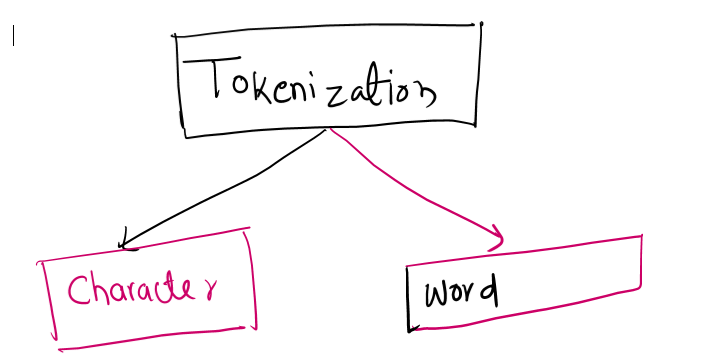

## Character Level Tokenization

In [34]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


* Model expects each
character to be converted to an integer, a process sometimes called **numericalization**. 

* One simple way to do this is by encoding each unique token (which are characters in this case) with a unique integer:

In [35]:
token2idx = {ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

* We can now use token2idx to transform the tokenized text to a list of integers


In [36]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


#### We can create the one-hot encodings in PyTorch by converting input_ids to a tensor and applying the one_hot() function as follows:


In [37]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
print(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx)) #--> one hot encoding
one_hot_encodings.shape

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])


torch.Size([38, 20])

In [38]:
print(one_hot_encodings)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

* For each of the 38 input tokens we now have a one-hot vector with 20 dimensions, since our vocabulary consists of 20 unique characters.

#### Note:

* It’s important to always set num_classes in the one_hot() function because otherwise the one-hot vectors may end up being shorter than the length of the vocabulary (and need to be padded with zeros manually). 

* In TensorFlow, the equivalent function is
**tf.one_hot()**, where the depth argument plays the role of num_classes.

In [39]:
print(f"Text :{text}")
print(f"Tokenized Text : {tokenized_text}")
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Text :Tokenizing text is a core task of NLP.
Tokenized Text : ['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization


In [40]:
word_tokenized_text = text.split()
print(word_tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In order to avoid being so wasteful with our model parameters
since models are expensive to train, and larger models are more difficult to
maintain. A common approach is to limit the vocabulary and discard rare
words by considering, say, the 100,000 most common words in the corpus.
Words that are not part of the vocabulary are classified as “unknown” and
mapped to a shared UNK token. This means that we lose some potentially
important information in the process of word tokenization, since the model
has no information about words associated with UNK

## Sub word Tokenization
The basic idea behind subword tokenization is to combine the best aspects
of character and word tokenization

* split rarewords into smaller units to allow the model to deal with complex words.
* keep frequent words as unique
entities so that we can keep the length of our inputs to a manageable size

There are several subword tokenization algorithms that are commonly used
in NLP, like  **WordPiece**, which is used by the BERT and
DistilBERT tokenizers.

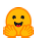 Transformers provides a convenient
AutoTokenizer class that allows you to quickly load the tokenizer
associated with a pretrained model

## AutoTokenizer

* Similar to the AutoTokenizer class, AutoModel has a
from_pretrained() method to load the weights of a pretrained model.

* The AutoTokenizer class belongs to a larger set of “auto” classes whose
job is to automatically retrieve the model’s configuration, pretrained
weights, or vocabulary from the name of the checkpoint. 

* This allows you to
quickly switch between models

In [41]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [42]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## manually loading DistilBerTokenizer / Other alternative for AutoTokenizer

In [43]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [44]:
encoded_text_distilbert = distilbert_tokenizer(text)
print(encoded_text_distilbert)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


* Using input_ids, we can convert them back into tokens by using the tokenizer’s convert_ids_to_tokens() method:

In [45]:
print(tokenizer.convert_ids_to_tokens(encoded_text['input_ids']))

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


* some special [CLS] and [SEP]
tokens have been added to the start and end of the sequence
* the tokens have each been lowercased, which is
a feature of this particular checkpoint
* “tokenizing” and “NLP” have been split into two tokens, which makes sense since they
are not common words. 
* The ## prefix in ##izing and ##p means that the
preceding string is not whitespace; any token with this prefix should be merged with the previous token when you convert the tokens back to a
string.
* The AutoTokenizer class has a convert_tokens_to_string()
method for doing just that

In [46]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])

In [47]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


## The AutoTokenizer class also has several attributes that provide information about the tokenizer

In [48]:
tokenizer.vocab_size

30522

In [49]:
tokenizer.model_max_length

512

In [50]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the Whole Dataset

We will use map method of the DatasetDict object

In [51]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

* padding=True will pad the examples with zeros to the size of the longest one in a batch,
* truncation=True will truncate the examples to the model’s maximum
context size.

In [52]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


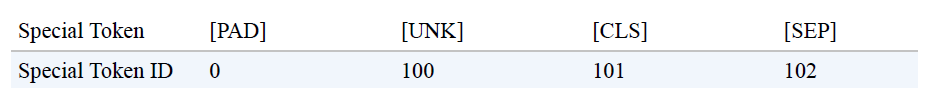

* In addition to returning the encoded tweets as input_ids, the
* tokenizer returns a list of attention_mask arrays. 
* The attention masks attention mask allows the model to ignore the padded(0) parts of the input.

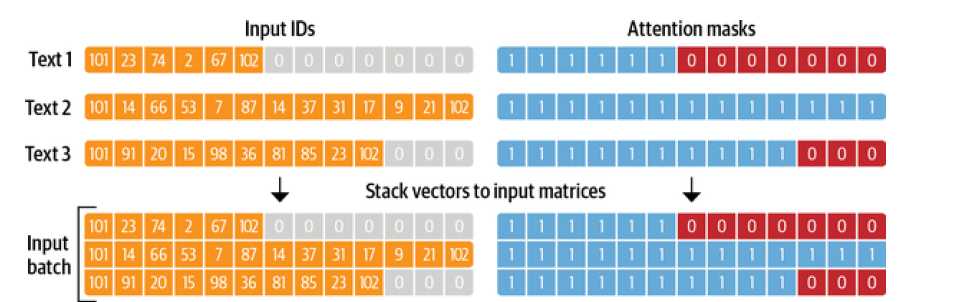


* For each batch, the input sequences are padded to the maximum sequence length in the
batch
* The attention mask is used in the model to ignore the padded areas of the input tensors

## Embedding text into tokens

In [53]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [54]:
emotions_encoded 

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [55]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [56]:
emotions_encoded['train']['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [57]:
print(emotions_encoded['train']['input_ids'][:5])

[[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 211

In [58]:
print(emotions_encoded['train']['attention_mask'][:5])

[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Text Classifier Steps
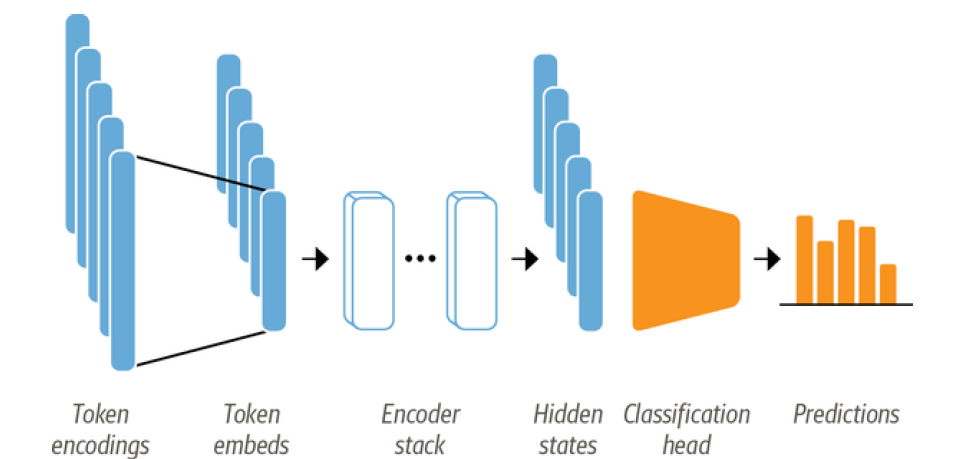

## Steps

* The text is tokenized and represented as one-hot vectors called token
encodings.
* The size of the tokenizer vocabulary determines the dimension of the token encodings, and it usually consists of 20k–200k unique tokens.

* The token encodings are converted to token embeddings, which are vectors living in a lower-dimensional space

* The token embeddings are then passed through the encoder block layers to yield a hidden state for each input token.

* For the pretraining objective of language modeling, each hidden state is fed to a layer that predicts the masked input tokens

* For the classification task, we replace the language modeling layer with a
classification layer.


#### We have two options to train such a model

* **Feature extraction** : We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.

* **Fine-tuning** : We train the whole model end-to-end, which also updates theparameters of the pretrained model.

## Transformers as Feature Extractors
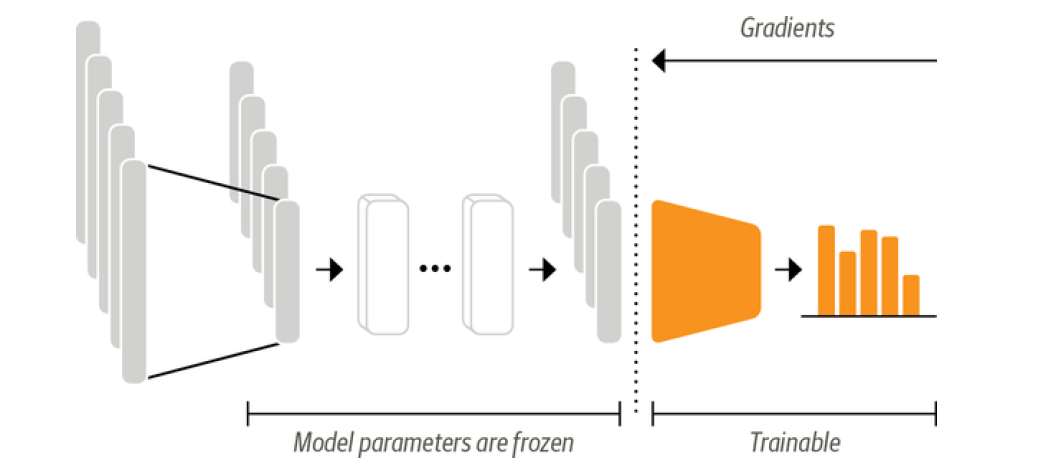

In [59]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = AutoModel.from_pretrained(model_ckpt).to(device)

cuda


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


* The AutoModel class converts the token encodings to embeddings, and then
feeds them through the encoder stack to return the hidden states

## Using pretrained models

In [60]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [61]:
type(inputs)

transformers.tokenization_utils_base.BatchEncoding

In [62]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

## Extracting the last hidden states

In [63]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


* torch.no_grad() context manager is used to disable the automatic calculation of the gradient

In [64]:
outputs.keys()

odict_keys(['last_hidden_state'])

In [65]:
outputs.last_hidden_state

tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0')

In [66]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

* **For classification tasks**, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. 

* Since this token appears at the start of each sequence, we can extract it by simply indexing into outputs.last_hidden_state as follows:

In [67]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

* a 768-
dimensional vector is returned for each of the 6 input tokens

## Extracting the last hidden state for the whole dataset by creating a new hidden_state column that stores all these vectors

In [68]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [69]:
def extract_hidden_states(batch):
  # Place model inputs on the GPU
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  # Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

* The only difference between this function and our previous logic is the final
step where we place the final hidden state back on the CPU as a NumPy
array. 

* The map() method requires the processing function to return Python
or NumPy objects when we’re using batched inputs.

#### Note:
The final hidden state is stored on the CPU as a NumPy array. 
* The map() method requires the processing function to return Python
or NumPy objects when we’re using batched inputs.

* The model expects tensors as inputs, the next thing to do is convert the input_ids and attention_mask columns to the "torch" format, as
follows:

def tokenize(batch):

    return tokenizer(batch["text"], padding=True, truncation=True)


emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [70]:
emotions_encoded.set_format("torch",columns=["input_ids", "attention_mask", "label"])

In [71]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [72]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

* We did not set batch_size=None in this case, which means the default batch_size=1000 is used instead

In [73]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [74]:
emotions_hidden["test"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [75]:
emotions_hidden["validation"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## Creating a feature matrix

* The preprocessed dataset now contains all the information we need to train a classifier on it. 

* We will use the hidden states as input features and the
labels as targets

In [76]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])


In [77]:
X_train.shape

(16000, 768)

In [78]:
X_valid.shape

(2000, 768)

In [79]:
y_train.shape

(16000,)

## Visualizing the training set

- UMAP algorithm to visualize the hidden states in 768 dimensions
- first apply a MinMaxScaler and then use the UMAP
implementation from the umap-learn library to reduce the hidden states

#### Install umap and umap.plot

In [80]:
"""
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
"""

'\n!pip install umap-learn[plot]\n!pip install holoviews\n!pip install -U ipykernel\n'

In [81]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,X,Y,label
0,4.607201,7.135812,0
1,-2.810679,6.283673,0
2,5.458425,3.566716,3
3,-2.219654,4.296409,2
4,-3.219826,4.241343,3


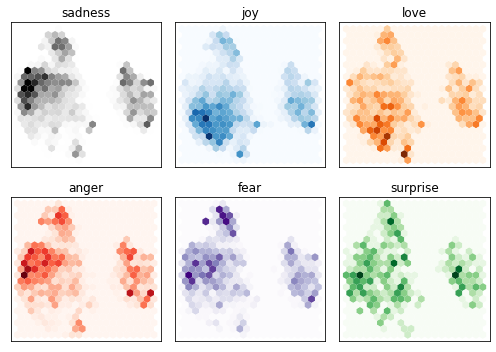

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
  gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

## Training a simple classifier

In [83]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

## Compare if our model is better than the Dummy Classifier

In [84]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

* Logistic Regression performs better than dummy Classifier

## Confusion Matrix 

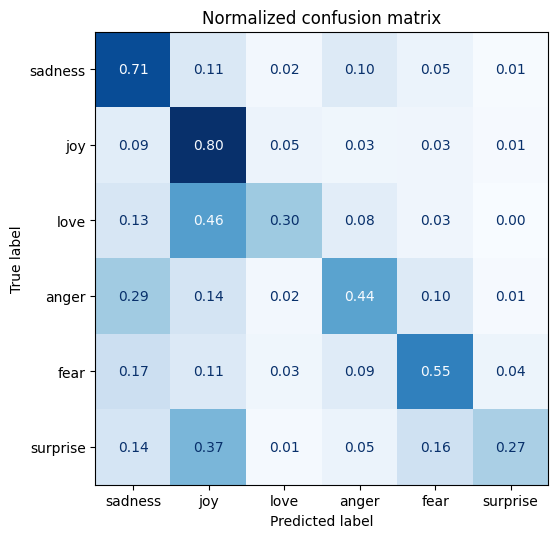

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6),dpi=100)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [86]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

* anger and fear are most often confused with sadness
* love and surprise are frequently mistaken for joy

## Fine-Tuning Transformers

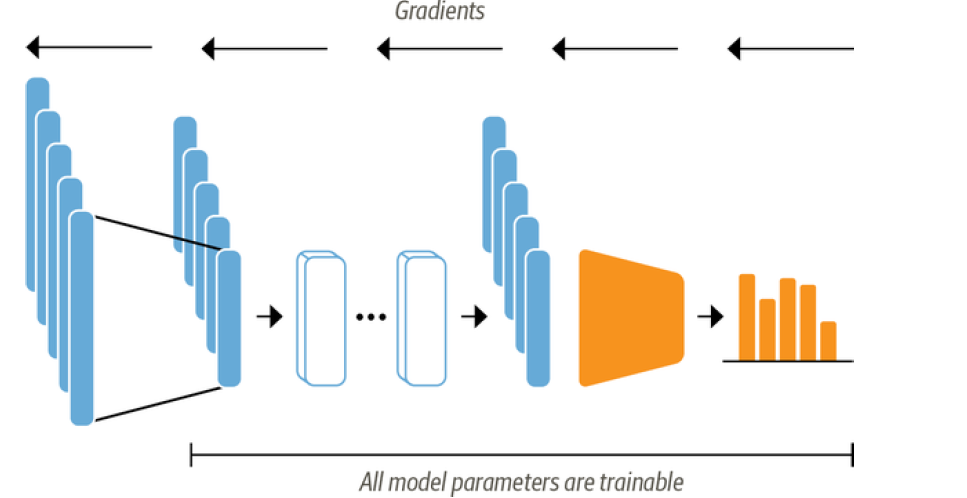


**Note** : When using the fine-tuning approach the whole DistilBERT model is trained along with
the classification head

* Training the hidden states that serve as inputs to the classification model
will help us avoid the problem of working with data that may not be well
suited for the classification task
* The initial hidden states will adapt
during training to decrease the model loss and thus increase its
performance.

#### The **AutoModelForSequenceClassification model** has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

In [148]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

In [144]:
model_ckpt,device

('distilbert-base-uncased', device(type='cuda'))

## Defining the performance metrics

In [98]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1} 

In [103]:
!pip install huggingface-hub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [101]:
from huggingface_hub import notebook_login
notebook_login()

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:510: FutureWarning: HfApi.login: This method is deprecated in favor of `set_access_token` and will be removed in v0.7.
  FutureWarning,


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Login successful
Your token has been saved to /root/.huggingface/token
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment vari

In [149]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
#model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir='./results', 
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [150]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = "True"

## Install git lfs

In [152]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 6,812 kB of archives.
After this operation, 15.4 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.1.4 [6,812 kB]
Fetched 6,812 kB in 1s (8,110 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/per

In [153]:
trainer = Trainer(model=model, 
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Cloning https://huggingface.co/Plaban81/results into local empty directory.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.825400,0.318235,0.904000,0.901727
2,0.251300,0.219628,0.925500,0.925759


TrainOutput(global_step=500, training_loss=0.5383404922485352, metrics={'train_runtime': 158.4577, 'train_samples_per_second': 201.947, 'train_steps_per_second': 3.155, 'total_flos': 720342861696000.0, 'train_loss': 0.5383404922485352, 'epoch': 2.0})

In [154]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [155]:
preds_output.metrics

{'test_loss': 0.2196284830570221,
 'test_accuracy': 0.9255,
 'test_f1': 0.9257592466737445,
 'test_runtime': 3.2033,
 'test_samples_per_second': 624.35,
 'test_steps_per_second': 9.99}

In [156]:
y_preds = np.argmax(preds_output.predictions, axis=1)

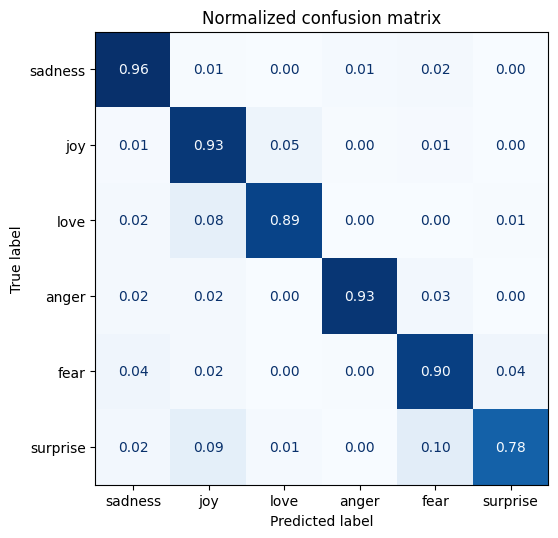

In [157]:
plot_confusion_matrix(y_preds, y_valid, labels)

* The love category is still often confused with joy, which seems natural. 

* surprise is also frequently mistaken for joy, or confused with fear.

In [158]:
preds = trainer.predict(emotions_encoded["test"])

In [160]:
preds.predictions

array([[ 4.336672  , -1.0263239 , -1.790963  ,  0.01744951, -1.143001  ,
        -1.816946  ],
       [ 4.466564  , -1.1481453 , -1.4768771 , -0.5340203 , -0.9504049 ,
        -1.7070299 ],
       [ 4.4146376 , -1.1171304 , -1.3413554 , -0.79794717, -0.8946902 ,
        -1.5353374 ],
       ...,
       [-0.9995803 ,  4.337148  , -0.64036137, -1.3937452 , -1.4897937 ,
        -1.1355481 ],
       [-0.9287516 ,  4.2566204 , -0.83888936, -1.3240632 , -1.2265264 ,
        -1.1833944 ],
       [-1.1840369 , -1.4380039 , -1.3005488 , -1.5156649 ,  2.129378  ,
         1.8321857 ]], dtype=float32)

In [161]:
final_predictions = np.argmax(preds.predictions, axis=1)

In [164]:
df_test.head()

,text,label,label_name
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy
4,i was feeling a little vain when i did this one,0,sadness


In [168]:
final_labels = [labels[i] for i in final_predictions]

In [169]:
df_test['predicted_label'] = final_labels

In [170]:
df_test.head()

,text,label,label_name,predicted_label
0,im feeling rather rotten so im not very ambiti...,0,sadness,sadness
1,im updating my blog because i feel shitty,0,sadness,sadness
2,i never make her separate from me because i do...,0,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy,joy
4,i was feeling a little vain when i did this one,0,sadness,sadness


## Error Analysis

In [171]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(),"predicted_label": pred_label.cpu().numpy()}

In [172]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [173]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_err = emotions_encoded["validation"][:][cols]
df_err ["label"] = df_err ["label"].apply(label_int2str)
df_err ["predicted_label"] = (df_err ["predicted_label"].apply(label_int2str))

In [174]:
df_err.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.022633
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.022648
2,i feel like a faithful servant,love,love,0.460488
3,i am just feeling cranky and blue,anger,anger,0.039860
4,i can have for a treat or if i am feeling festive,joy,joy,0.020686


## Top 10 data samples with the highest losses

In [175]:
df_err.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.568407
1950,i as representative of everything thats wrong ...,surprise,sadness,5.450209
1963,i called myself pro life and voted for perry w...,joy,sadness,5.215614
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.178443
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.073546
1274,i am going to several holiday parties and i ca...,joy,sadness,4.886373
1111,im lazy my characters fall into categories of ...,joy,fear,4.851234
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.843280
1509,i guess this is a memoir so it feels like that...,joy,fear,4.745281
177,im sure much of the advantage is psychological...,sadness,joy,4.678541
